Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


INSTALLING RELEVANT LIBRARIES

In [ ]:
import numpy as np
import dlib
import cv2
from math import hypot
from google.colab.patches import cv2_imshow

DETECTION CODE USING DLIB

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/MyDrive/Computer_Vision_Rayah_Zahid_Awan_EE1379/FINAL_PROJECT_Drowsiness_Detection/Dataset_for_CV/shape_predictor_68_face_landmarks (1).dat")

In [ ]:
def mid(p1 ,p2):
    return int((p1.x + p2.x)/2), int((p1.y + p2.y)/2)

In [ ]:
def eye_aspect_ratio(eye_landmark, face_roi_landmark):
    left_point = (face_roi_landmark.part(eye_landmark[0]).x, face_roi_landmark.part(eye_landmark[0]).y)
    right_point = (face_roi_landmark.part(eye_landmark[3]).x, face_roi_landmark.part(eye_landmark[3]).y)
    center_top = mid(face_roi_landmark.part(eye_landmark[1]), face_roi_landmark.part(eye_landmark[2]))
    center_bottom = mid(face_roi_landmark.part(eye_landmark[5]), face_roi_landmark.part(eye_landmark[4]))
    hor_line_length = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    ver_line_length = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))
    ratio = hor_line_length / ver_line_length
    return ratio


In [ ]:
def mouth_aspect_ratio(lips_landmark, face_roi_landmark):
    left_point = (face_roi_landmark.part(lips_landmark[0]).x, face_roi_landmark.part(lips_landmark[0]).y)
    right_point = (face_roi_landmark.part(lips_landmark[2]).x, face_roi_landmark.part(lips_landmark[2]).y)
    center_top = (face_roi_landmark.part(lips_landmark[1]).x, face_roi_landmark.part(lips_landmark[1]).y)
    center_bottom = (face_roi_landmark.part(lips_landmark[3]).x, face_roi_landmark.part(lips_landmark[3]).y)
    hor_line_length = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    ver_line_length = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))
    if hor_line_length == 0:
        return ver_line_length
    ratio = ver_line_length / hor_line_length
    return ratio

In [ ]:
count = 0
font = cv2.FONT_HERSHEY_TRIPLEX

DETECTING FROM IMAGES TEST#1

In [ ]:
img= '/content/drive/MyDrive/Computer_Vision_Rayah_Zahid_Awan_EE1379/FINAL_PROJECT_Drowsiness_Detection/Dataset_for_CV/1.jpg'

PREPARING RAW DATA

In [ ]:
img = cv2.imread(img,-1)

In [ ]:
img = cv2.flip(img,1)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = detector(gray)

SELECTING POINTS

In [ ]:
for face_roi in faces:
  count=0
  landmark_list = predictor(gray, face_roi)
  left_eye_ratio = eye_aspect_ratio([36, 37, 38, 39, 40, 41], landmark_list)
  right_eye_ratio = eye_aspect_ratio([42, 43, 44, 45, 46, 47], landmark_list)
  eye_open_ratio = (left_eye_ratio + right_eye_ratio) / 2
  cv2.putText(img, str(eye_open_ratio), (0, 13), font, 0.5, (100, 100, 100))
  ###print(left_eye_ratio,right_eye_ratio,eye_open_ratio)

  inner_lip_ratio = mouth_aspect_ratio([60,62,64,66], landmark_list)
  outter_lip_ratio = mouth_aspect_ratio([48,51,54,57], landmark_list)
  mouth_open_ratio = (inner_lip_ratio + outter_lip_ratio) / 2;
  cv2.putText(img, str(mouth_open_ratio), (448, 13), font, 0.5, (100, 100, 100))
  ###print(inner_lip_ratio,outter_lip_ratio,mouth_open_ratio)
  
  if mouth_open_ratio > 0.380 and eye_open_ratio > 4.0 or eye_open_ratio > 4.30: 
    count +=1
  else:
    count = 0
 
  x,y = face_roi.left(), face_roi.top()
  x1,y1 = face_roi.right(), face_roi.bottom()

  if count>=1:
    cv2.rectangle(img, (x,y), (x1,y1), (0, 0, 255), 2)
    cv2.putText(img, "Sleepy", (x, y-5), font, 0.5, (0, 0, 255))

  else:
    cv2.rectangle(img, (x,y), (x1,y1), (230, 230, 250), 2)
    cv2.putText(img, "Awake", (x, y-5), font, 0.5, (230, 230, 250))
        

RESULT

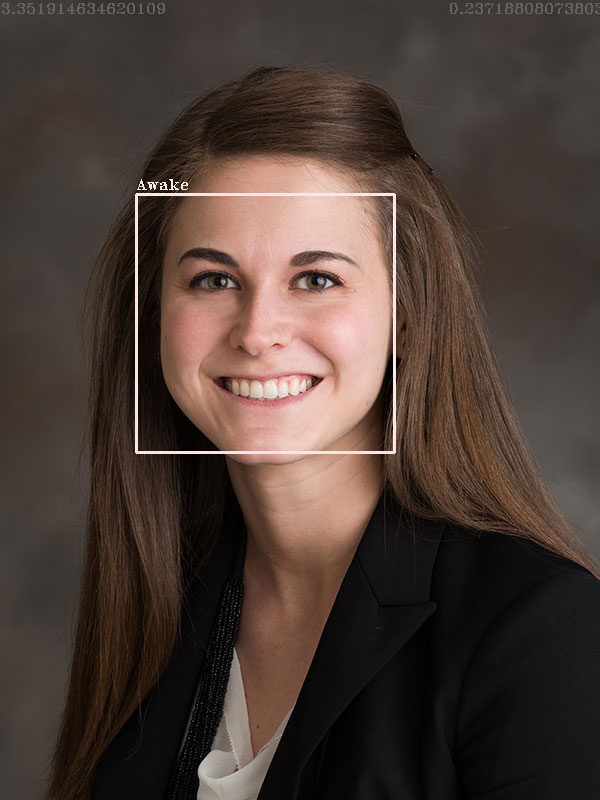

In [ ]:
cv2_imshow(img)

DETECTING FROM IMAGES TEST# 2

In [ ]:
img= '/content/drive/MyDrive/Computer_Vision_Rayah_Zahid_Awan_EE1379/FINAL_PROJECT_Drowsiness_Detection/Dataset_for_CV/11.jpg'

PREPARING RAW DATA

In [ ]:
img = cv2.imread(img,-1)

In [ ]:
img = cv2.flip(img,1)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = detector(gray)

SELECTING POINTS

In [ ]:
for face_roi in faces:
  count=0
  landmark_list = predictor(gray, face_roi)
  left_eye_ratio = eye_aspect_ratio([36, 37, 38, 39, 40, 41], landmark_list)
  right_eye_ratio = eye_aspect_ratio([42, 43, 44, 45, 46, 47], landmark_list)
  eye_open_ratio = (left_eye_ratio + right_eye_ratio) / 2
  cv2.putText(img, str(eye_open_ratio), (0, 13), font, 0.5, (100, 100, 100))
  ###print(left_eye_ratio,right_eye_ratio,eye_open_ratio)

  inner_lip_ratio = mouth_aspect_ratio([60,62,64,66], landmark_list)
  outter_lip_ratio = mouth_aspect_ratio([48,51,54,57], landmark_list)
  mouth_open_ratio = (inner_lip_ratio + outter_lip_ratio) / 2;
  cv2.putText(img, str(mouth_open_ratio), (448, 13), font, 0.5, (100, 100, 100))
  ###print(inner_lip_ratio,outter_lip_ratio,mouth_open_ratio)
  
  if mouth_open_ratio > 0.380 and eye_open_ratio > 4.0 or eye_open_ratio > 4.30: 
    count +=1
  else:
    count = 0
 
  x,y = face_roi.left(), face_roi.top()
  x1,y1 = face_roi.right(), face_roi.bottom()

  if count>=1:
    cv2.rectangle(img, (x,y), (x1,y1), (0, 0, 255), 2)
    cv2.putText(img, "Sleepy", (x, y-5), font, 0.5, (0, 0, 255))

  else:
    cv2.rectangle(img, (x,y), (x1,y1), (230, 230, 250), 2)
    cv2.putText(img, "Awake", (x, y-5), font, 0.5, (230, 230, 250))

RESULT

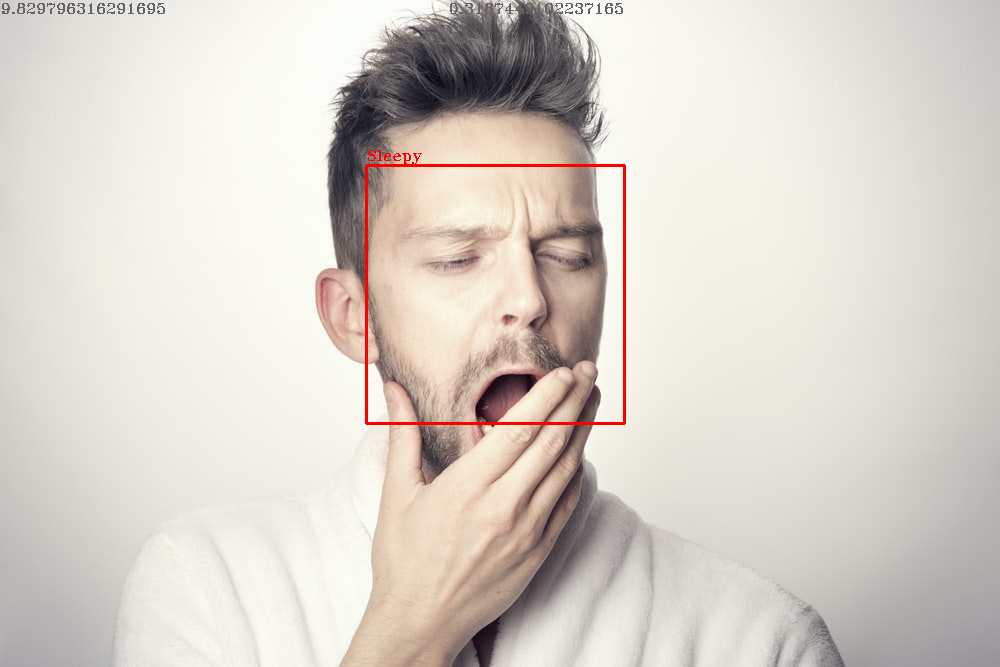

In [ ]:
cv2_imshow(img)

DETECTING FROM VIDEO
TEST SUBJECT 1

In [ ]:
import cv2
video_name = "/content/drive/MyDrive/Computer_Vision_Rayah_Zahid_Awan_EE1379/FINAL_PROJECT_Drowsiness_Detection/Dataset_for_CV/awake.mp4" 
vidcap = cv2.VideoCapture(video_name)
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [ ]:
img= '/content/frame1.jpg'

In [ ]:
#PREPARING RAW DATA

In [ ]:
img = cv2.imread(img,-1)

In [ ]:
img = cv2.flip(img,1)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = detector(gray)

SELECTING POINTS

In [ ]:
for face_roi in faces:
  count=0
  landmark_list = predictor(gray, face_roi)
  left_eye_ratio = eye_aspect_ratio([36, 37, 38, 39, 40, 41], landmark_list)
  right_eye_ratio = eye_aspect_ratio([42, 43, 44, 45, 46, 47], landmark_list)
  eye_open_ratio = (left_eye_ratio + right_eye_ratio) / 2
  cv2.putText(img, str(eye_open_ratio), (0, 13), font, 0.5, (100, 100, 100))
  ###print(left_eye_ratio,right_eye_ratio,eye_open_ratio)

  inner_lip_ratio = mouth_aspect_ratio([60,62,64,66], landmark_list)
  outter_lip_ratio = mouth_aspect_ratio([48,51,54,57], landmark_list)
  mouth_open_ratio = (inner_lip_ratio + outter_lip_ratio) / 2;
  cv2.putText(img, str(mouth_open_ratio), (448, 13), font, 0.5, (100, 100, 100))
  ###print(inner_lip_ratio,outter_lip_ratio,mouth_open_ratio)
  
  if mouth_open_ratio > 0.380 and eye_open_ratio > 4.0 or eye_open_ratio > 4.30: 
    count +=1
  else:
    count = 0
 
  x,y = face_roi.left(), face_roi.top()
  x1,y1 = face_roi.right(), face_roi.bottom()

  if count>=1:
    cv2.rectangle(img, (x,y), (x1,y1), (0, 0, 255), 2)
    cv2.putText(img, "Sleepy", (x, y-5), font, 0.5, (0, 0, 255))

  else:
    cv2.rectangle(img, (x,y), (x1,y1), (230, 230, 250), 2)
    cv2.putText(img, "Awake", (x, y-5), font, 0.5, (230, 230, 250))
        

RESULT

In [ ]:
cv2_imshow(img)

DETECTING FROM VIDEO TEST SUBJECT 2
```


In [ ]:
import cv2
video_name = "/content/drive/MyDrive/Computer_Vision_Rayah_Zahid_Awan_EE1379/FINAL_PROJECT_Drowsiness_Detection/Dataset_for_CV/sleepy.mp4" 
vidcap = cv2.VideoCapture(video_name)
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [ ]:
img= '/content/frame1.jpg'



PREPARING RAW DATA

In [ ]:
img = cv2.imread(img,-1)

In [ ]:
img = cv2.flip(img,1)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
faces = detector(gray)

SELECTING POINTS

In [ ]:
for face_roi in faces:
  count=0
  landmark_list = predictor(gray, face_roi)
  left_eye_ratio = eye_aspect_ratio([36, 37, 38, 39, 40, 41], landmark_list)
  right_eye_ratio = eye_aspect_ratio([42, 43, 44, 45, 46, 47], landmark_list)
  eye_open_ratio = (left_eye_ratio + right_eye_ratio) / 2
  cv2.putText(img, str(eye_open_ratio), (0, 13), font, 0.5, (100, 100, 100))
  ###print(left_eye_ratio,right_eye_ratio,eye_open_ratio)

  inner_lip_ratio = mouth_aspect_ratio([60,62,64,66], landmark_list)
  outter_lip_ratio = mouth_aspect_ratio([48,51,54,57], landmark_list)
  mouth_open_ratio = (inner_lip_ratio + outter_lip_ratio) / 2;
  cv2.putText(img, str(mouth_open_ratio), (448, 13), font, 0.5, (100, 100, 100))
  ###print(inner_lip_ratio,outter_lip_ratio,mouth_open_ratio)
  
  if mouth_open_ratio > 0.380 and eye_open_ratio > 4.0 or eye_open_ratio > 4.30: 
    count +=1
  else:
    count = 0
 
  x,y = face_roi.left(), face_roi.top()
  x1,y1 = face_roi.right(), face_roi.bottom()

  if count>=1:
    cv2.rectangle(img, (x,y), (x1,y1), (0, 0, 255), 2)
    cv2.putText(img, "Sleepy", (x, y-5), font, 0.5, (0, 0, 255))

  else:
    cv2.rectangle(img, (x,y), (x1,y1), (230, 230, 250), 2)
    cv2.putText(img, "Awake", (x, y-5), font, 0.5, (230, 230, 250))
        

RESULT

In [ ]:
cv2_imshow(img)